In [1]:
# Import essential libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set()

C:\Users\Dan\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Import data.
data = pd.read_csv('cardio_new.csv')
print("Data dims : ", data.shape)
data.head()

Data dims :  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Data description (features):**  
* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm)
* Weight | Objective Feature | weight | float (kg)
* Gender | Objective Feature | gender | categorical code | 1: women, 2: men
* Systolic blood pressure | Examination Feature | ap_hi | int
* Diastolic blood pressure | Examination Feature | ap_lo | int
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal
* Smoking | Subjective Feature | smoke | binary | 0: no, 1: yes
* Alcohol intake | Subjective Feature | alco | binary | 0: no, 1: yes
* Physical activity | Subjective Feature | active | binary | 0: inactive, 1: active
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary | 0: absent, 1: present

---

In [3]:
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

**Data Preparation and Exploratory Analysis**

In [4]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


***Note:*** *notice that the minimum age here is 10798 days (29.6 years), so perhaps we cannot very reliably use this data to predict cardiovascular disease for much younger patients.*

**Data Cleaning**

From the data description above, it seems that there are some errors regarding `ap_hi` and `ap_lo`. There are some negative, exceptionally high, or exceptionally low values. This is not possible since "ap" is for blood pressure.  

We remove all entries containing the following conditions:  
* `ap_hi` (systolic pressure) lower than `ap_lo` (diastolic pressure)
* `ap_hi` higher than `350` or lower than `60` (negative included)
* `ap_lo` higher than `250` or lower than `40` (negative included)

Note that the upper/lower bounds are stated somewhat arbitrarily (according to common sense, e.g. values above 300 is just "too high").  

We also found out that the smallest value of `weight` to be anomalously low (10 kg) although `age` of the corresponding entry signifies an adult. Therefore, we remove `weight` values below 30 kg.  

Other than that, the rest of the data looks fine and structured. There are no `NaN` values.

In [5]:
# check if there is any NaN values
data.isnull().values.any()

False

In [6]:
drop = data.query('ap_hi > 350 or\
                   ap_hi < 60 or\
                   ap_lo > 250 or\
                   ap_lo < 40 or\
                   ap_hi < ap_lo or\
                   weight < 30').index   # Indices of entries matching our criteria.

data = data.drop(labels=drop)
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### Exploratory Data Analysis

C:\Users\Dan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

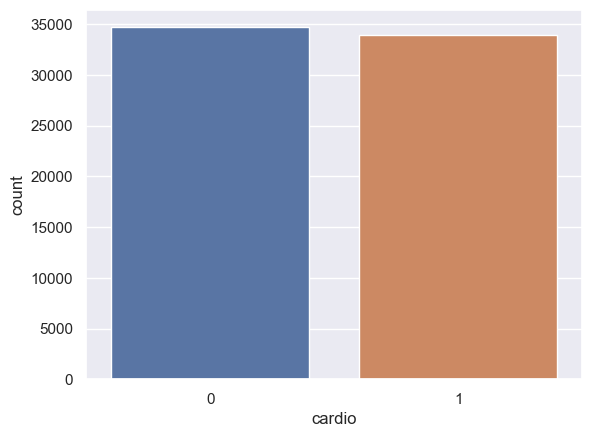

In [7]:
# Count plot for cardio disease (0 or 1).
sns.countplot(data['cardio'])

Turns out that the dataset is almost perfectly balanced, so no need to balance the data beforehand.

C:\Users\Dan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Us

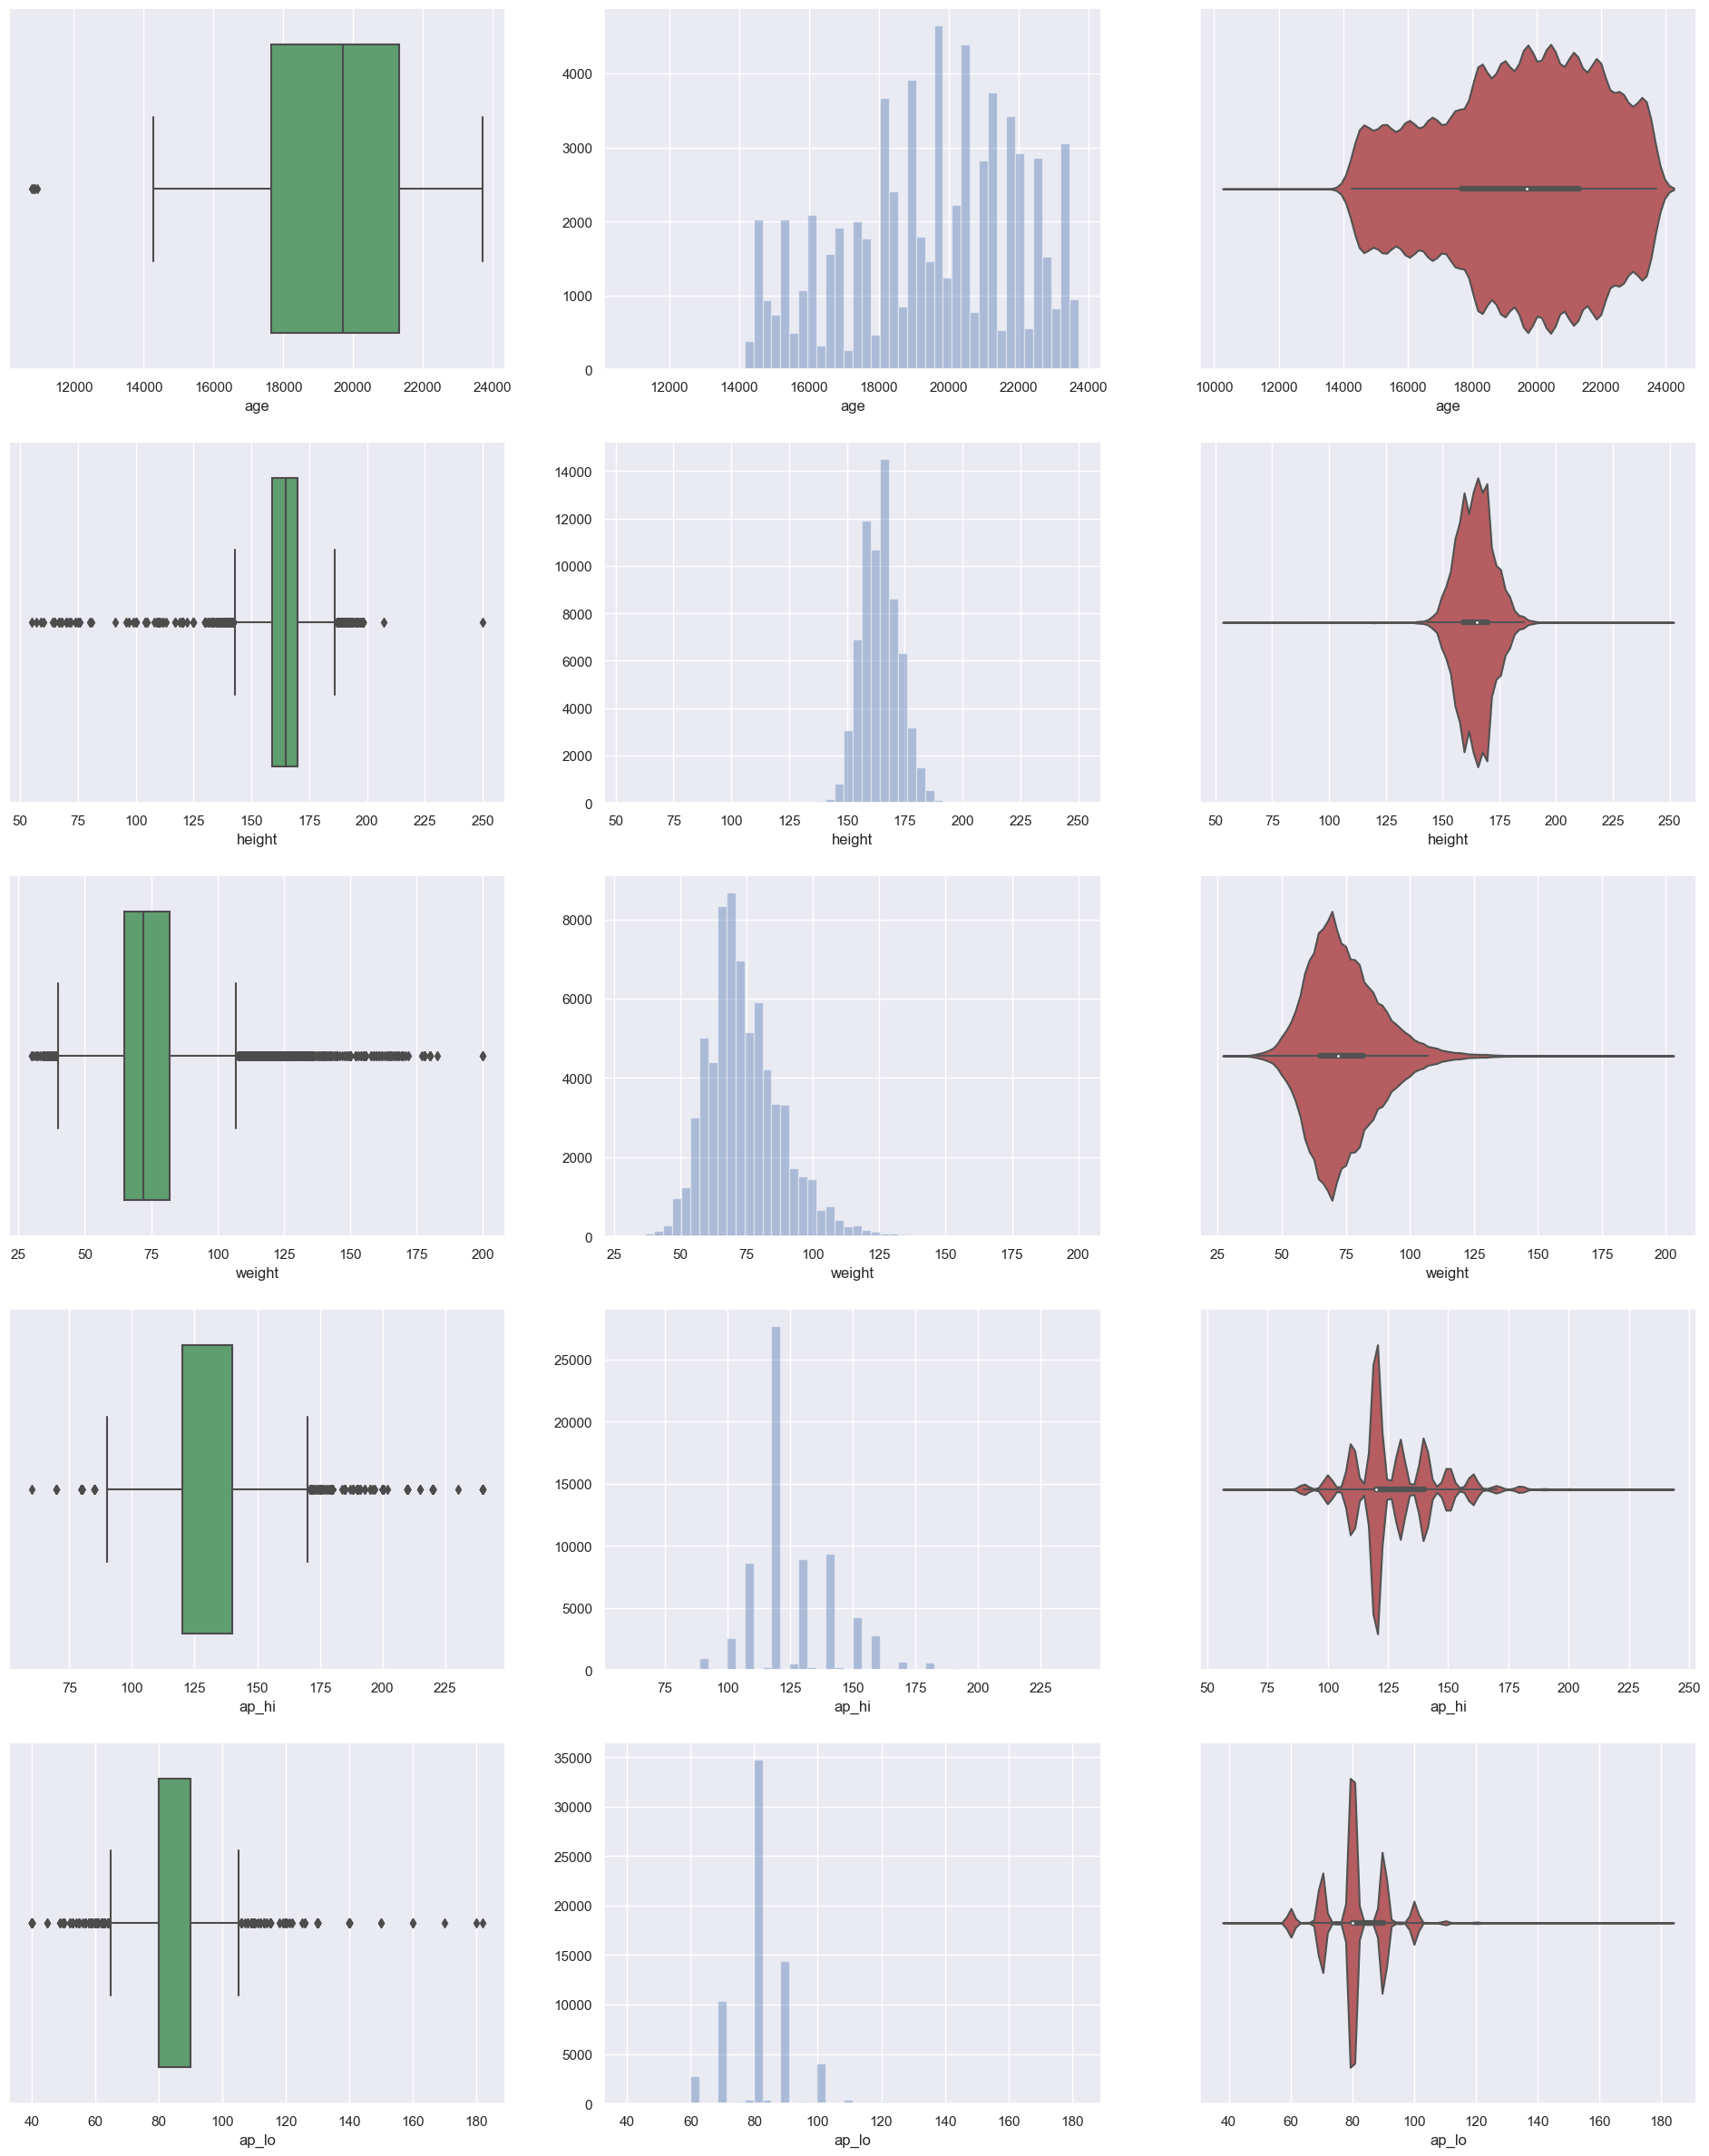

In [8]:
# Plot the distributions of numerical features.

plt_list = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

f, axes = plt.subplots( len(plt_list), 3, figsize=(24, 6*len(plt_list)) )

for i, feature in enumerate(plt_list):
    sns.boxplot(data[feature], orient = "h", ax = axes[i][0], color = "g")
    sns.distplot(data[feature], kde = False, ax = axes[i][1], color = "b")
    sns.violinplot(data[feature], ax = axes[i][2], color = "r")

There are quite a number of anomalies for almost all the numerical features. However,bearing in mind that:
* A lot data is being used, therefore it should be expected to have quite a number of anonalies.
* The data are of real world readings from a diverse set of patients. 
* These anomalies could be important data for predicting the presence of cardiovascular disease.

Therefore, they will not be remove for now.

The distribution of the data seems fine, with `age` ranging from 29 to 65 years, and relatively normal distribution for `weight` and `height`. It can be seen that some kind of quantization has been done for `ap_hi` and `ap_lo`. This is most likely due to manual measurement of blood pressure using analog instruments, causing majority of the reading to be rounded to the tens . 

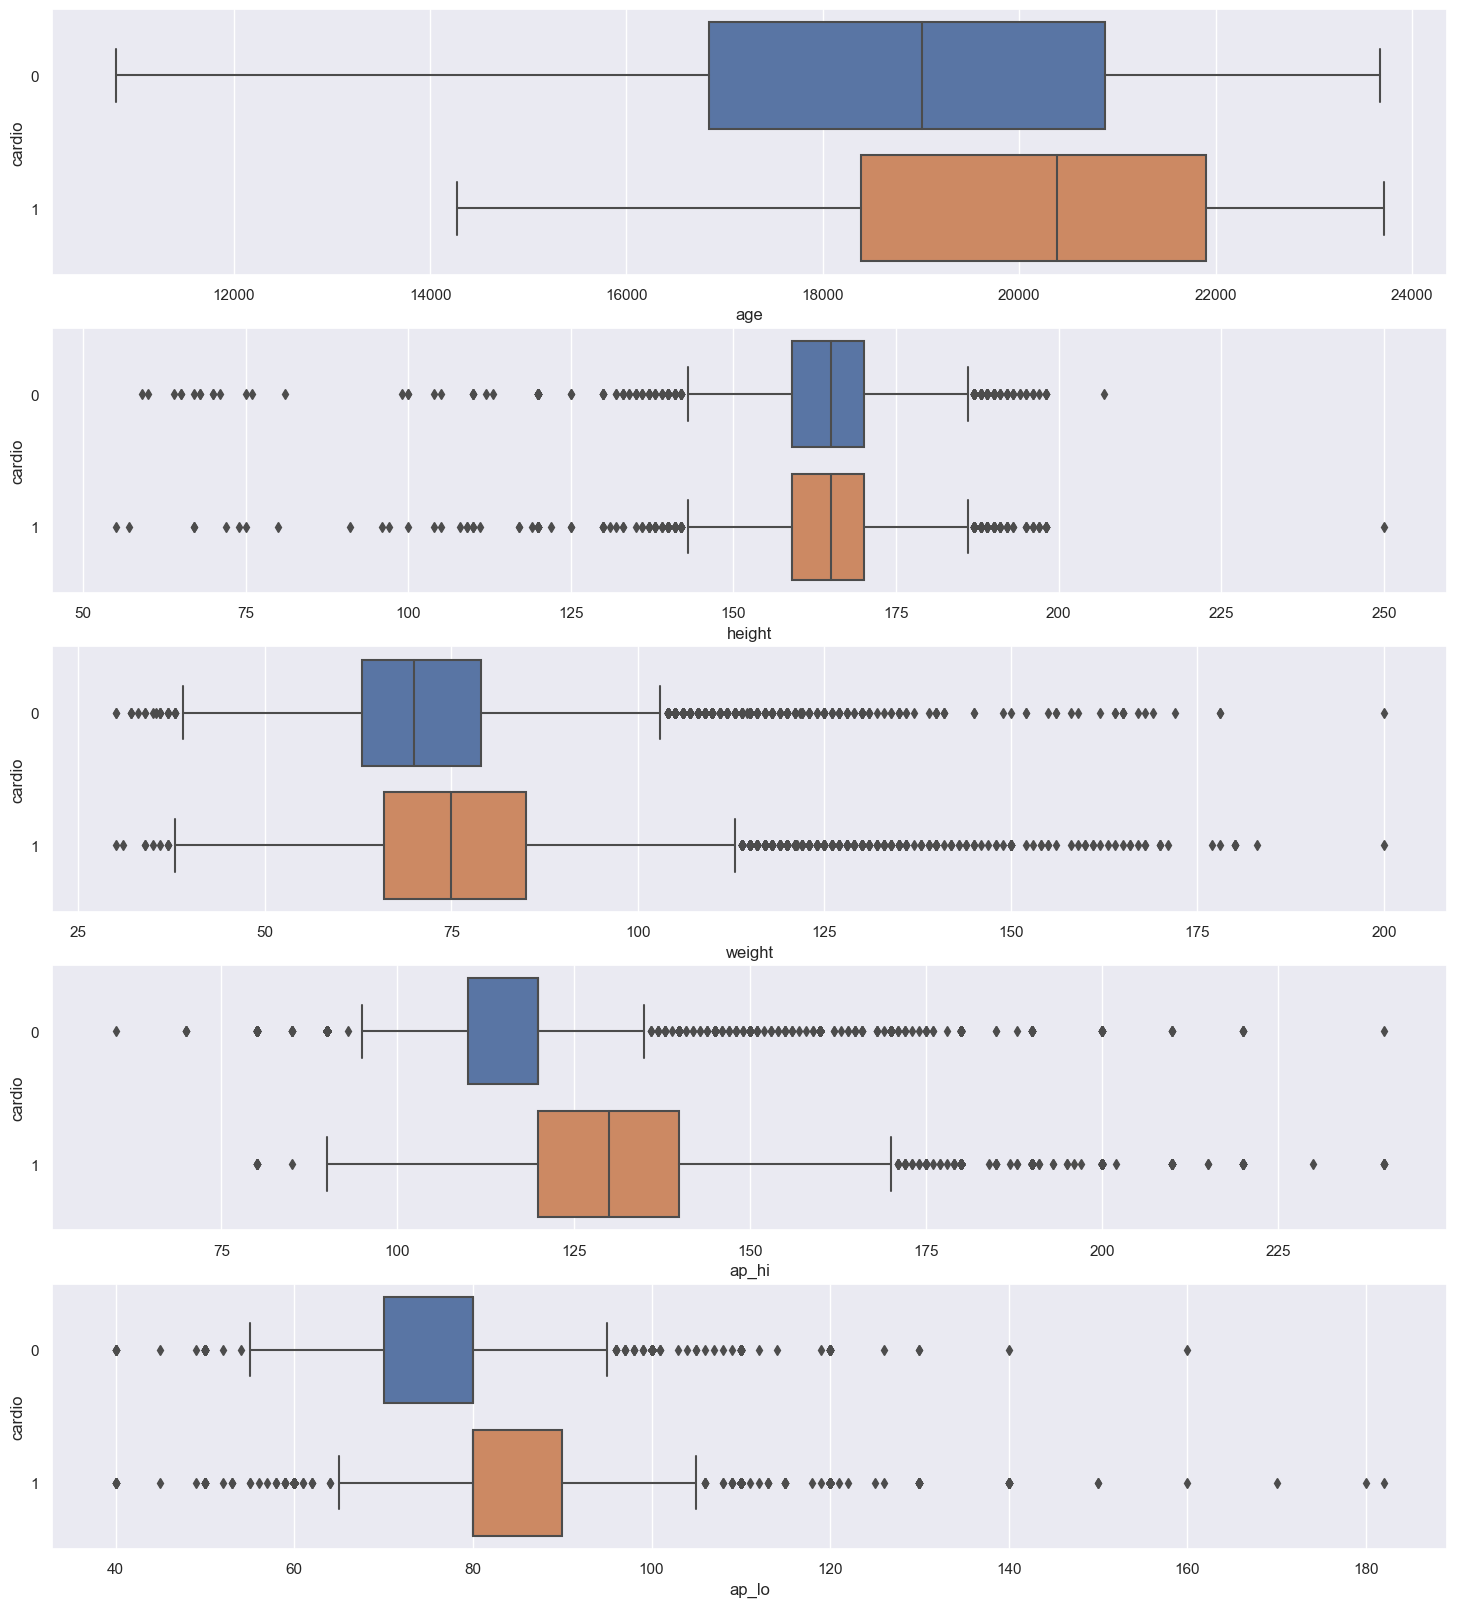

In [9]:
# Swarmplot for 'cardio' (cardiovascular disease) vs all the numerical features. 
f, axes = plt.subplots( len(plt_list), 1, figsize=(18, 4*len(plt_list)) )

for i, feature in enumerate(plt_list):
    sns.boxplot(x = data[feature], y = data['cardio'], orient = "h", ax = axes[i])

It can be seen that there is a slight correlation between `cardio` and `weight`, a clear relationship between `cardio` and `age`, and strong relationship between `cardio` and blood pressures. A higher blood pressure seem to correlate to higher chance of having cardiovascular disease. Therefore, these features are a useful tool for predicting cardiovascular disease.  

The relationship between `cardio` and `height`does not seem to indicate any correlation.  

Categorical countplot for cardio == 0


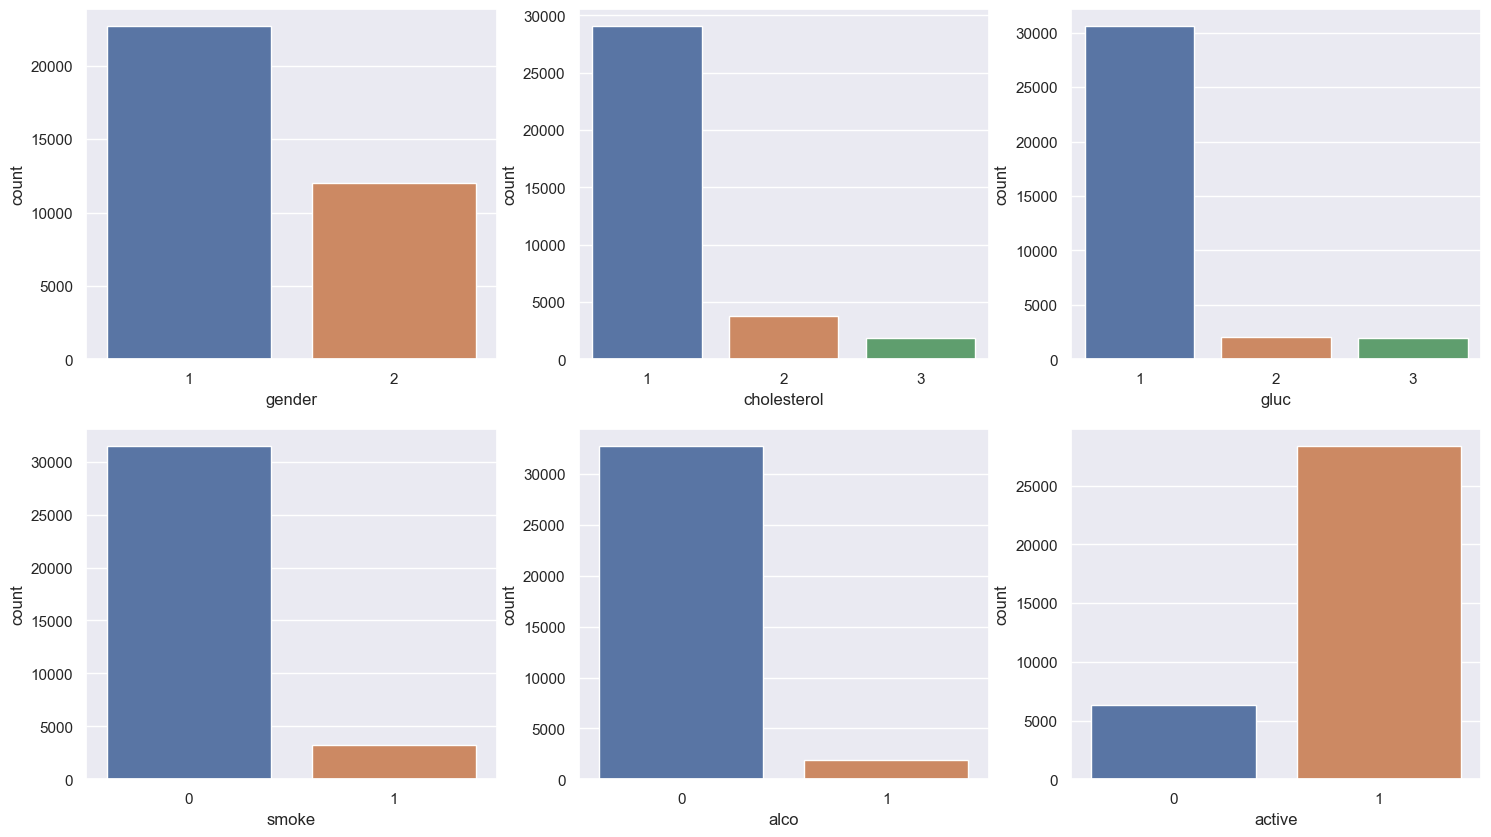

In [10]:
# Do countplot for categorical features for cardio == 0 and cardio == 1.

cat_list = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
    
test_zero = data[data['cardio'] == 0]   # Contains all entries with 'cardio' == 0.
test_one = data[data['cardio'] == 1]    # Contains all entries with 'cardio' == 1.

# Countplot for categorical labels (for cardio == 0)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

print("Categorical countplot for cardio == 0")
for i, feature in enumerate(cat_list):
    sns.countplot(x = feature, data = test_zero, ax = axes[i//3][i%3])

Categorical countplot for cardio == 1


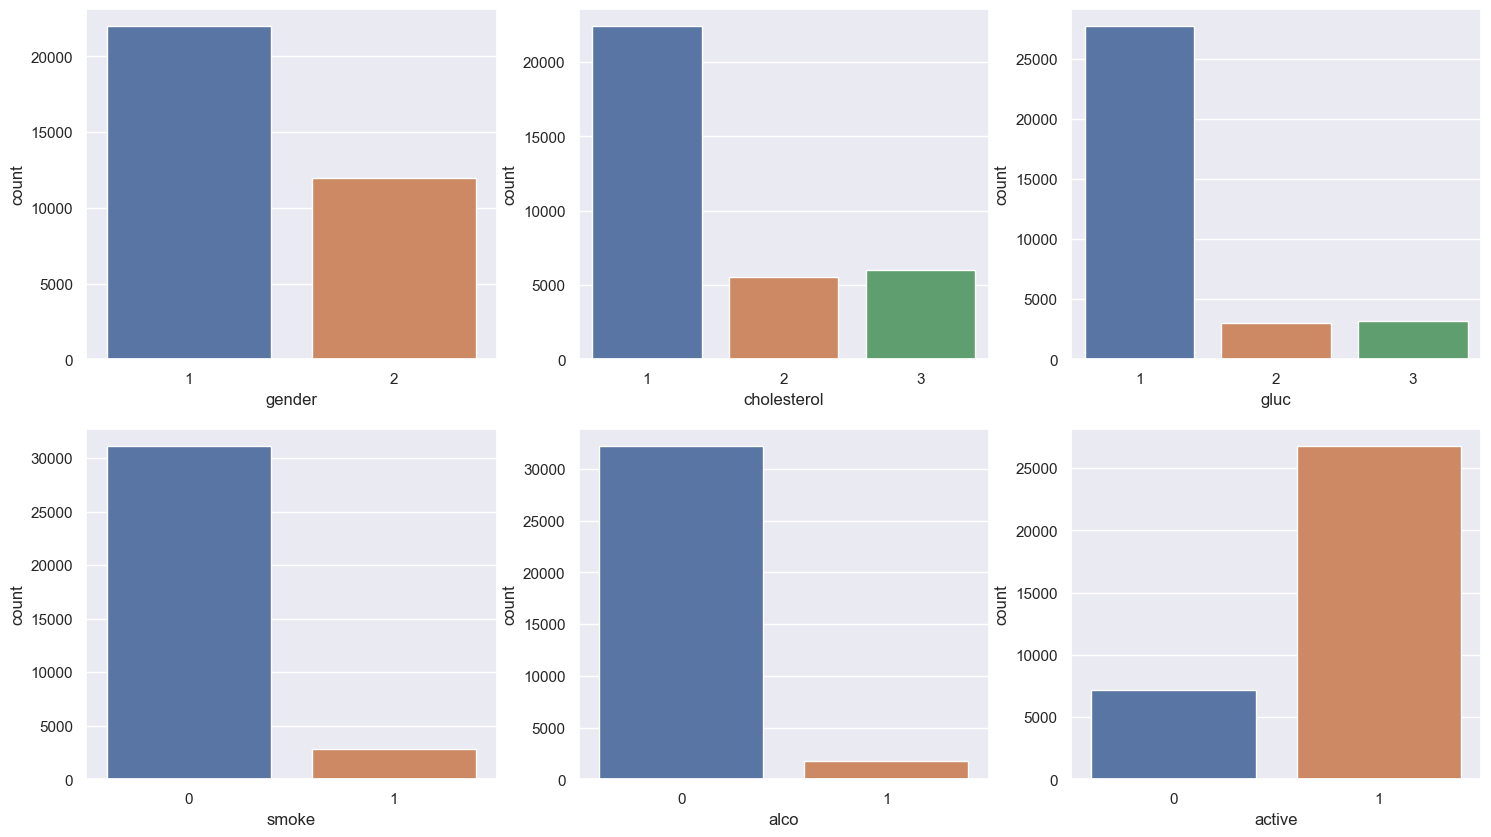

In [11]:
# Countplot for categorical labels (for cardio == 1)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

print("Categorical countplot for cardio == 1")
for i, feature in enumerate(cat_list):
    sns.countplot(x = feature, data = test_one, ax = axes[i//3][i%3])

There is a noticeable difference for the feature count of `cholesterol` and `gluc` for `cardio == 0` and `cardio == 1`. The other feature counts are similar for `cardio == 0` and `cardio == 1`. This might prove that a lot of these categorical features do not have apparent correlation with cardiovascular disease.

**Machine Learning**

An attempt to predict whether a person has cardiovascular disease based on his/her information (features).

**Binary Decision Tree**

In [12]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

# Extract Response and Predictors
y = pd.DataFrame(data['cardio'])
X = pd.DataFrame(data[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
                       'gluc', 'smoke', 'alco', 'active']]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 72.73181%

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 73.12266%

False negative rate on TEST data: 28.13055%


Viewing a premade graph (NOT the same tree as the one run due to random train_test_split).


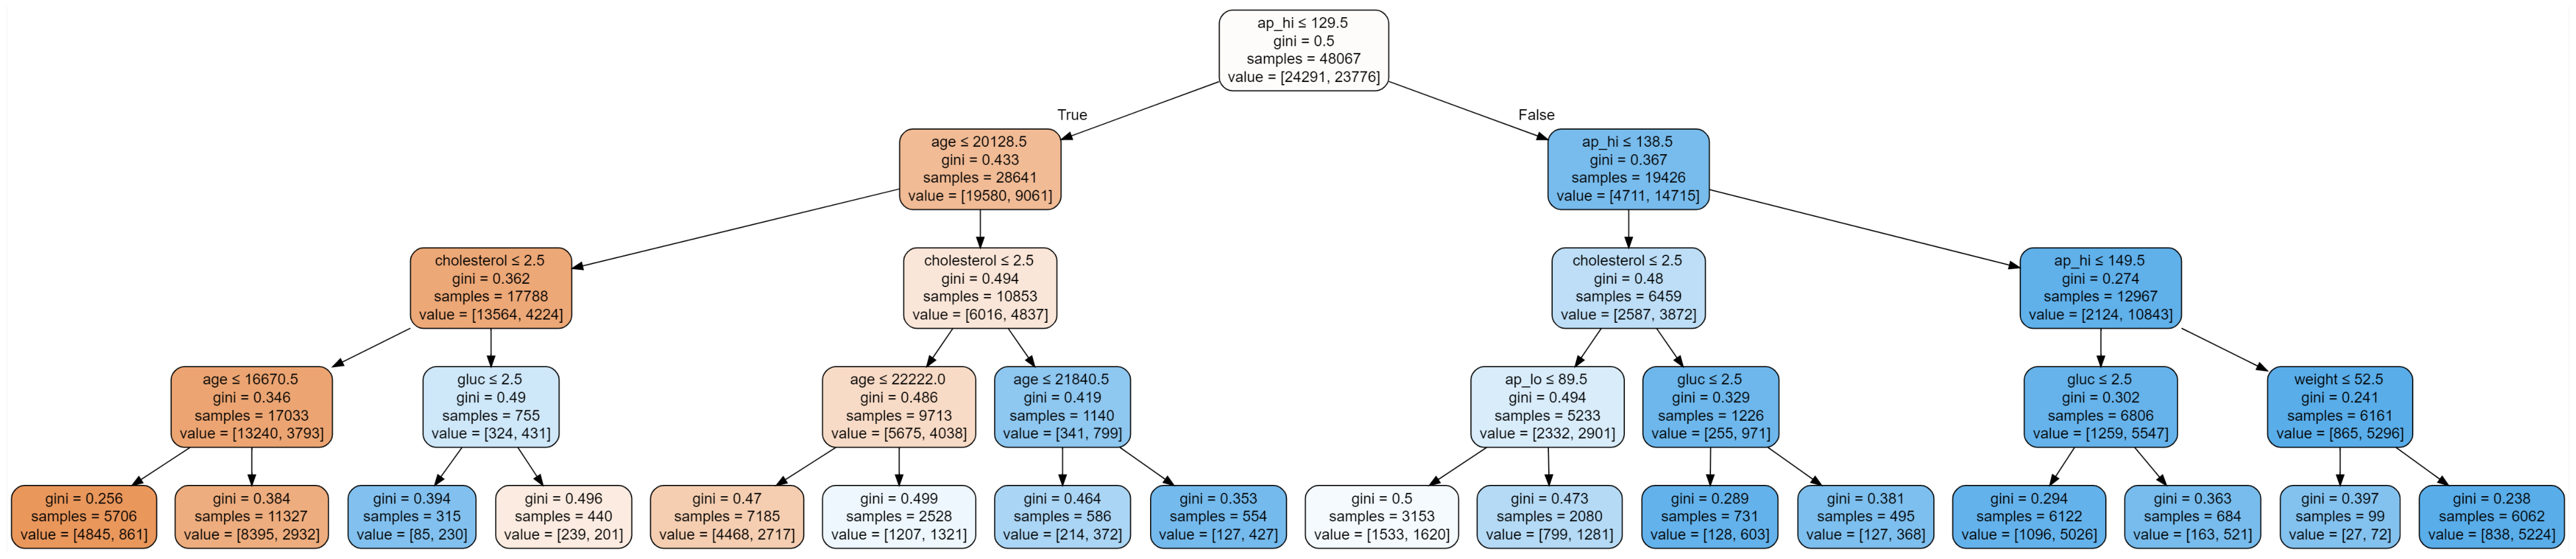

<AxesSubplot:>

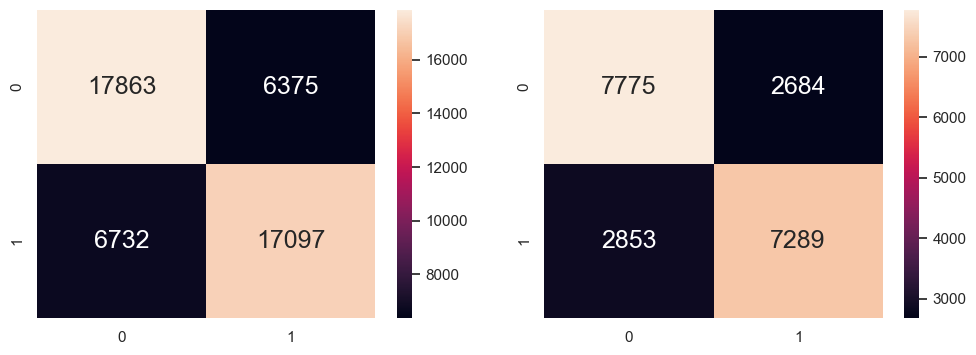

In [13]:
dectree = DecisionTreeClassifier(max_depth = 4)  # Create the decision tree object.
dectree.fit(X_train, y_train)                    # Train on the train partition.

# Predict Response corresponding to Predictors
y_train_pred_bdt = dectree.predict(X_train)
y_test_pred_bdt = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t: {:.5f}%".format( dectree.score(X_train, y_train)*100 ))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t: {:.5f}%".format( dectree.score(X_test, y_test)*100 ))
print()

cm = confusion_matrix(y_test, y_test_pred_bdt)
print("False negative rate on TEST data: {:.5f}%".format( (cm[1][0] / (cm[1][0] + cm[1][1]))*100 ))


# Plot the Decision Tree
# import graphviz
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# treedot = export_graphviz(dectree,                          # the model
#                           feature_names = X_train.columns,  # the features
#                           out_file = None,                  # output file
#                           filled = True,                    # node colors
#                           rounded = True,                   # make pretty
#                           special_characters = True)        # postscript

# graphviz.Source(treedot)

print("\n\nViewing a premade graph (NOT the same tree as the one run due to random train_test_split).")

fig, ax = plt.subplots(1, 1, figsize=(50, 50))
img = plt.imread('dectree.png', format='png')
ax.grid(False)
plt.axis('off')
plt.imshow(img, )
plt.show()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_bdt),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred_bdt), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Accuracy of the model on test data was about 73%, which is not stellar but acceptable. The false negative rate is approximately 28%, which is not too low. We strive to avoid high false negative rates since we are dealing with medical predictions (we certainly do not want to predict someone who suffers from the disease as healthy).  

Let's see how other models perform.

---
### Random Forest

C:\Users\Dan\AppData\Local\Temp\ipykernel_9156\2591347197.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)     # Train on the train partition.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 72.71725%

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 72.96248%

False negative rate on TEST data: 34.67758%


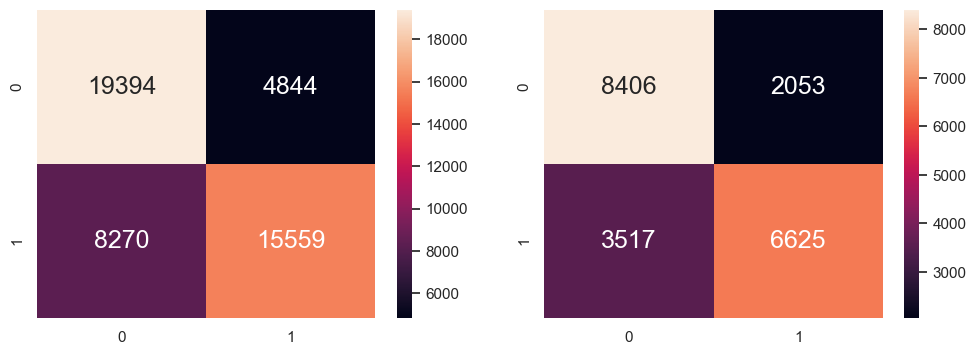

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Reuse the split train and test data from previous part (binary decision tree).

rf = RandomForestClassifier(n_estimators = 100, max_depth = 4, random_state = 42)
rf.fit(X_train, y_train)     # Train on the train partition.

# Predict Response corresponding to Predictors
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t: {:.5f}%".format( rf.score(X_train, y_train)*100 ))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t: {:.5f}%".format( rf.score(X_test, y_test)*100 ))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_rf),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

cm = confusion_matrix(y_test, y_test_pred_rf)
print("False negative rate on TEST data: {:.5f}%".format( (cm[1][0] / (cm[1][0] + cm[1][1]))*100 ))

This model seems to have similar accuracy with Binary Decision Tree, yet this model does not have improved classification performance compared to binary decision tree. False negative rate is actually worse than that of binary decision tree.  

Random Forest also provides `feature_importances_` that lets us see which input features are the most "important" for the output (and *how* important they are).

ap_hi          0.519678
ap_lo          0.233256
age            0.100917
cholesterol    0.095795
weight         0.036812
gluc           0.009989
active         0.001754
height         0.001010
smoke          0.000387
alco           0.000294
gender         0.000109
dtype: float64


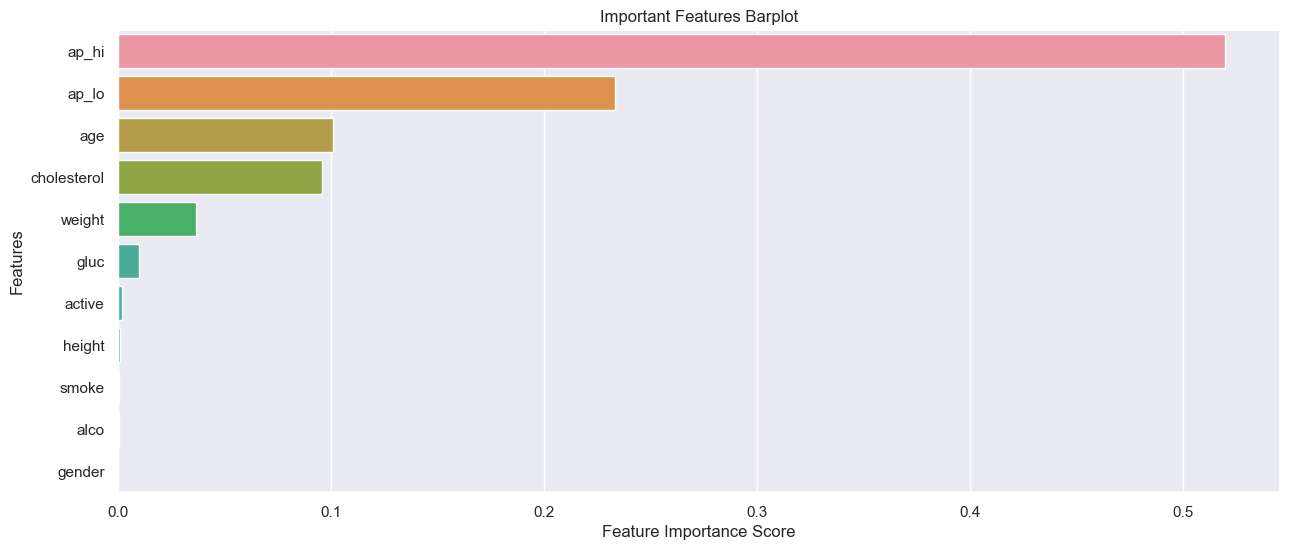

In [15]:
feature_imp = pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending=False)
print(feature_imp)

fig, axes = plt.subplots(1, 1, figsize=(15,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Important Features Barplot")
plt.show()

The top 6 important features are `ap_hi`, `ap_lo`, `age`, `cholesterol`, `weight`, and `gluc`. This agrees with the plot of the binary decision tree (it can be seen that `ap_hi` is placed at the root and features other than the 6 features mentioned do not appear anywhere in the tree). We can try to run the models by using only the important features (omitting the rest), but this will not improve the tree's accuracy as the tree algorithm itself can already "differentiate" which features are important and which are not. This might also be true for other models (except logistic regression).  

Surprisingly, `active`, `smoke`, and `alco` are regarded as unimportant. This might be due to:
1. Subjectivity of those involved in collecting data; e.g. when asked to classify if he/she is active (`active` being 1 or 0), one's standard might be different from others (e.g. one might jog once a week and still feel that he is not active enough, while another person with the same activity might consider himself "active" due to the fact that he jogs).
2. Categorical nature leading to data loss; e.g. a patient is considered a smoker (`smoke == 1`) regardless of how often he/she does it (smoking once a week and smoking an entire box everyday fall into the same category).

---
### Logistic Regression

Goodness of Fit of Model 	Train Dataset


C:\Users\Dan\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Accuracy 	: 70.16248%

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 70.62279%

False negative rate on TEST data: 34.50996%


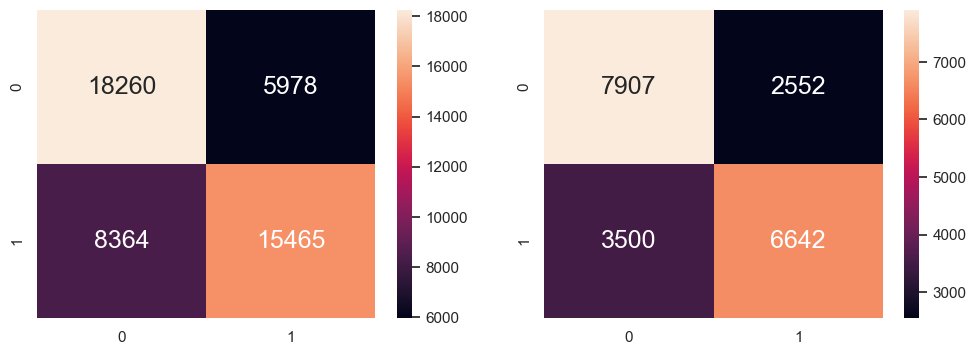

In [16]:
from sklearn.linear_model import LogisticRegression

# Reuse the split train and test data from previous part (binary decision tree).

lr = LogisticRegression(C = 8, solver = 'lbfgs', max_iter = 200)
lr.fit(X_train, y_train)     # Train on the train partition.

# Predict Response corresponding to Predictors
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t: {:.5f}%".format( lr.score(X_train, y_train)*100 ))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t: {:.5f}%".format( lr.score(X_test, y_test)*100 ))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_lr),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred_lr), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

cm = confusion_matrix(y_test, y_test_pred_lr)
print("False negative rate on TEST data: {:.5f}%".format( (cm[1][0] / (cm[1][0] + cm[1][1]))*100 ))

Again, unfortunately this model is not really an improvement as compared to previous ones. The best performer so far seems to be the binary decision tree. As discussed previously, this might be due to the non-linear fashion of the data.

Finally, let's try a deep learning model: the fully connected neural network, which can also exhibit non-linear behavior. However, there is no guarantee that neural network will outperform binary decision tree.

---
### Neural Network (Multilayer Perceptron)

To implement our neural network model, we use a popular, high-level deep learning API called ***Keras***. This API uses another deep learning framework as its back-end, *TensorFlow*, which is built by Google.

To run this model, we only need to install TensorFlow. Keras comes along with TensorFlow in the form of `tensorflow.keras`. 

In [17]:
# Import the required framework.
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [18]:
# Encode the label data (y_train and y_test) using one-hot encoding scheme.
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Build the neural network model.
nn = Sequential()

nn.add( BatchNormalization( input_shape = (len(X_train.columns),) ))  # Normalization layer to normalize data.
nn.add( Dense(40, activation='relu') )                                # Fully connected (hidden) layer.
nn.add( BatchNormalization() )
nn.add( Dense(40, activation='relu') )
nn.add( BatchNormalization() )
nn.add( Dense(2, activation='softmax') )

# Compile the model.
nn.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
nn.summary()

C:\Users\Dan\anaconda3\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 11)                  │              44 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 40)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 40)                  │             160 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 40)                  │           1,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 40)                  │             160 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              82 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,566 (10.02 KB)

 Trainable params: 2,384 (9.31 KB)

 Non-trainable params: 182 (728.00 B)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.7404 - loss: 0.5351
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.7397 - loss: 0.5315
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.7351 - loss: 0.5376
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.7358 - loss: 0.5373
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.7419 - loss: 0.5311
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.7385 - loss: 0.5346
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.7364 - loss: 0.5361
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.7385 - loss: 0.5347
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.7365 - loss: 0.5366
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.7390 - loss: 0.5344
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.7399 - loss: 0.5326
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step

<AxesSubplot:>

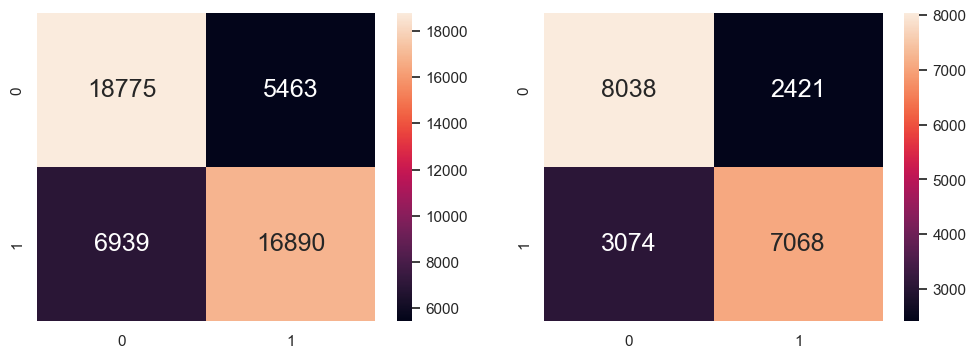

In [21]:
# Train the model on training data.
nn.fit(X_train, y_train_encoded, epochs=20, batch_size=512)

# Predict response corresponding to predictors.
y_train_pred_nn = np.argmax(nn.predict(X_train), axis=1)
y_test_pred_nn = np.argmax(nn.predict(X_test), axis=1)

# Check the accuracy and the loss of the model (on both train and test data).
loss, accuracy = nn.evaluate(X_train, y_train_encoded)
print("\nOn TRAIN data:\nLoss     : {:.5f}\nAccuracy : {:.5f}%\n\n".format(loss, accuracy*100))
loss, accuracy = nn.evaluate(X_test, y_test_encoded)
print("\nOn TEST data:\nLoss     : {:.5f}\nAccuracy : {:.5f}%\n".format(loss, accuracy*100))

cm = confusion_matrix(y_test, y_test_pred_nn)
print("False negative rate on TEST data: {:.5f}%".format( (cm[1][0] / (cm[1][0] + cm[1][1]))*100 ))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_nn),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred_nn), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

The model performs with virtually the same accuracy with binary decision tree (though occasionally the neural network is more accurate by a minuscule amount (at most +1%) as compared to binary decision tree). The false negative rate is sometimes similar to that of binary decision tree, and sometimes worse.  

**Side note:**  
A neural network like this has lots of parameters that we can try to tune so as to get the best result (e.g. layer width, layer depth, batch size, epoch, etc). Therefore this model might or might not be the best model possible (there is a possibility that the model can be tuned better than it currently is).  

We found that tweaking `batch_size` to some values can slightly bring down the false negative rate. For now, 512 seems to be the sweet spot. Batch size also significantly affects training time.

---

## Attempt to Improve the Prediction

We had tried 4 different models and got approximately the same accuracy. What if we use all 4 models at the same time?

The idea is to sum up the predictions from all 4 models, so we have a new result denoted as `pred_total`. This divides the prediction result into 5 categories (`pred_total` ranging form 0-4). The higher `pred_total` is, the more probable one should be to suffer from cardiovascular disease; if all 4 models predict `cardio` to be 1 (i.e. `pred_total == 4`), then we should be more convinced that `cardio` is indeed 1.

In [22]:
result = pd.DataFrame(y_test)     # This is the dataframe where we will compare the correct label
                                  # and the predictions from all 4 models.
    
result['pred_bdt'] = y_test_pred_bdt    # Prediction by binary decision tree
result['pred_rf'] = y_test_pred_rf      # Prediction by random forest
result['pred_lr'] = y_test_pred_lr      # Prediction by logistic regression
result['pred_nn'] = y_test_pred_nn      # Prediction by neural network

# Total number of positive predictions from all 4 models...
result['pred_total'] = y_test_pred_bdt + y_test_pred_rf +\
                       y_test_pred_lr + y_test_pred_nn

result.head(10)

,cardio,pred_bdt,pred_rf,pred_lr,pred_nn,pred_total
60193,1,1,0,1,1,3
26108,1,1,1,1,1,4
40918,0,1,1,1,1,4
55334,1,1,1,1,1,4
56159,1,0,0,0,1,1
44962,1,0,0,0,0,0
3560,1,1,1,1,1,4
19959,0,0,0,0,0,0
4681,1,0,0,0,0,0
59031,1,1,1,1,1,4


Then, we can calculate the "probability" of `cardio` being 1 for each number of positive predictions, based on the data we have.

0    6873
4    1544
1    1061
3     511
2     470
Name: pred_total, dtype: int64


C:\Users\Dan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


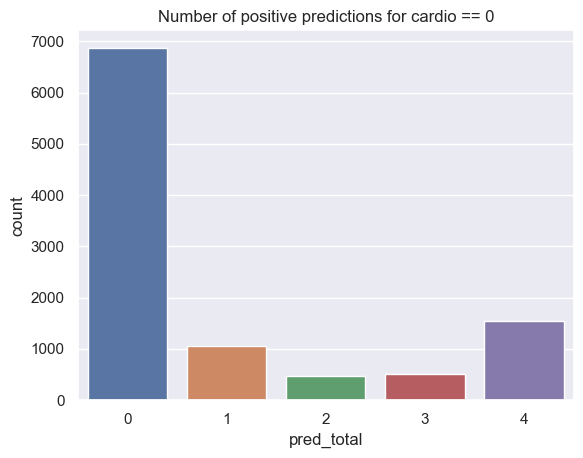

In [23]:
# Extract the real label and the prediction (total vote).
result_compare = pd.DataFrame(result[['cardio', 'pred_total']])

# Separate entries with cardio == 0 and cardio == 1. Then, take only pred_total.
result_compare_zero = result_compare[ result_compare['cardio'] == 0 ] ['pred_total']
result_compare_one = result_compare[ result_compare['cardio'] == 1 ] ['pred_total']

# Value counts for each number of votes for cardio == 0.
count_zero = pd.value_counts(result_compare_zero)
print(count_zero)
sns.countplot(result_compare_zero)
plt.title("Number of positive predictions for cardio == 0")
plt.show()

4    5789
0    2211
3     918
1     734
2     490
Name: pred_total, dtype: int64


C:\Users\Dan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


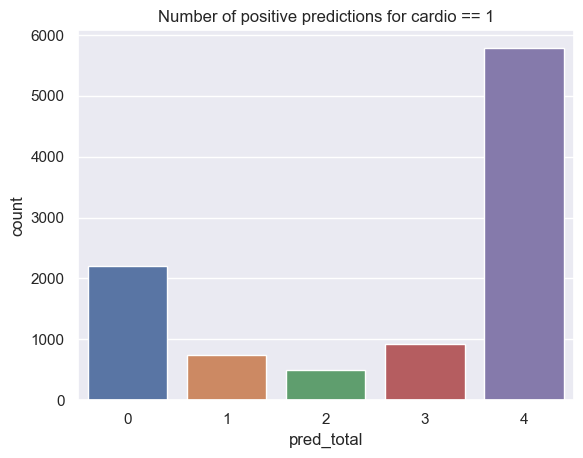

In [24]:
# Value counts for each number of votes for cardio == 1.
count_one = pd.value_counts(result_compare_one)
print(count_one)
sns.countplot(result_compare_one)
plt.title("Number of positive predictions for cardio == 1")
plt.show()

Based on the available dataset...

If number of positive predictions: 0
  - Probability for cardio == 0 is 75.6605%
  - Probability for cardio == 1 is 24.3395%

If number of positive predictions: 1
  - Probability for cardio == 0 is 59.1086%
  - Probability for cardio == 1 is 40.8914%

If number of positive predictions: 2
  - Probability for cardio == 0 is 48.9583%
  - Probability for cardio == 1 is 51.0417%

If number of positive predictions: 3
  - Probability for cardio == 0 is 35.7593%
  - Probability for cardio == 1 is 64.2407%

If number of positive predictions: 4
  - Probability for cardio == 0 is 21.0555%
  - Probability for cardio == 1 is 78.9445%



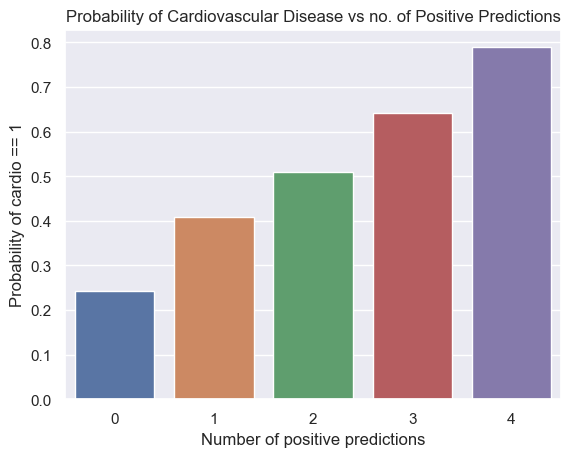

In [25]:
# Calculate simple probabilities for cardio == 0 and 1 for the given number of positive predictions...
print("Based on the available dataset...\n")

for i in range(5):
    print("If number of positive predictions: {}".format(i))
    print("  - Probability for cardio == 0 is {:.4f}%".format( count_zero[i]/(count_zero[i]+count_one[i])*100 ))
    print("  - Probability for cardio == 1 is {:.4f}%".format( count_one[i]/(count_zero[i]+count_one[i])*100 ))
    print()
    
# Plot the probability of cardio == 1 for a given number of positive predictions.
prob = []
for i in range(5):
    prob.append( count_one[i]/(count_zero[i]+count_one[i]) )  # Probability of cardio == 1 for i number of votes.

sns.barplot(x = list(range(5)), y = prob)
plt.title('Probability of Cardiovascular Disease vs no. of Positive Predictions')
plt.xlabel('Number of positive predictions')
plt.ylabel('Probability of cardio == 1')
plt.show()

This plot shows how the probability of having cardiovascular disease increases as `pred_total` increases. Note that there is still some probability that a person has cardiovascular disease even though all models predict otherwise (`pred_total == 0`). However, based on the data, the probability of that happening is about 25%, lower than the false negative rate of any individual model.

---
## Conclusion

* We successfully predicted the presence of cardiovascular disease using the available features. Accuracy was acceptable (around 73%), remembering that this is a medical data.
* The top 6 most important features in predicting cardiovascular disease are:
    1. Systolic blood pressure (`ap_hi`)
    2. Diastolic blood pressure (`ap_lo`)
    3. Age of a person
    4. Cholesterol level
    5. Weight of a person
    6. Glucose level (`gluc`)
* Some categorical features are regarded as "not important" even though they should be, due to subjectivity and loss of data.
* We used 4 different models, yielding similar results. Then, we tried to use all 4 models to improve our prediction. The number of total predictions divide the samples into 5 categories which indicates their probability of having a cardiovascular disease. The higher the category number, the more probable cardiovascular disease is.